In [68]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [69]:
sa=pd.read_csv("/content/drive/MyDrive/INTERNSHIP/NANDHINI/Salary Data.csv")
sa.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [70]:
sa.isnull().sum()

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [71]:
sa=sa.dropna()

In [72]:
encoders = {}
for col in ["Gender", "Education Level", "Job Title"]:
    le = LabelEncoder()
    sa[col] = le.fit_transform(sa[col])
    encoders[col] = le


In [73]:
X = sa[["Age", "Gender", "Education Level", "Job Title", "Years of Experience"]]
y = sa["Salary"]

In [74]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [75]:
model=LinearRegression()
model.fit(X,y)
print("Model trained successfully")

Model trained successfully


In [76]:
print("\nEnter user input for prediction:")
age = float(input("Age: "))
gender = input("Gender (Male/Female): ")
edu = input("Education Level (Bachelor's/Master's/PhD): ")
job = input("Job Title (Software Engineer/Data Analyst/Senior Manager etc.): ")
exp = float(input("Years of Experience: "))


Enter user input for prediction:
Age: 30
Gender (Male/Female): Female
Education Level (Bachelor's/Master's/PhD): PhD
Job Title (Software Engineer/Data Analyst/Senior Manager etc.): Data Analyst
Years of Experience: 5


In [77]:
gender_enc = encoders["Gender"].transform([gender])[0]
edu_enc = encoders["Education Level"].transform([edu])[0]
job_enc = encoders["Job Title"].transform([job])[0]

user_data = [[age, gender_enc, edu_enc, job_enc, exp]]

In [78]:
user_data_scaled = sc.transform(user_data)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [79]:
print("\nDecoded User Input:")
print("Gender:", encoders["Gender"].inverse_transform([gender_enc])[0])
print("Education Level:", encoders["Education Level"].inverse_transform([edu_enc])[0])
print("Job Title:", encoders["Job Title"].inverse_transform([job_enc])[0])
predicted_salary = model.predict(user_data_scaled)
print("Predicted Salary:", predicted_salary[0])


Decoded User Input:
Gender: Female
Education Level: PhD
Job Title: Data Analyst
Predicted Salary: 78117.5828226883


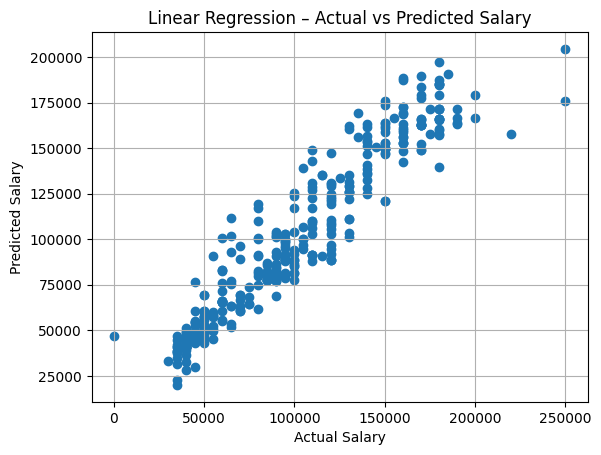

In [80]:
y_pred = model.predict(X)

plt.scatter(y, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Linear Regression – Actual vs Predicted Salary")
plt.grid(True)
plt.show()
